# Homework 3
## Austin Castelo


### 1)  
#### a)
$l_0(x)=\frac{(x-x_1)(x-x_3)}{(x_0-x_1)(x_0-x_3)}=\frac{(x-1)(x-3)}{(-1)(-3)}=\frac{(x-1)(x-3)}{3}$

$l_1(x)=\frac{(x-x_0)(x-x_3)}{(x_1-x_0)(x_1-x_3)}=\frac{(x)(x-3)}{(1)(-2)}=\frac{x^2-3x}{-2}$

$l_3(x)=\frac{(x-x_0)(x-x_1)}{(x_3-x_0)(x_3-x_1)}=\frac{(x)(x-1)}{(3)(2)}=\frac{x^2-x}{6}$

$P_2(x)=l_0(x)f_0+l_0(x)f_1+l_3(x)f_3 = \frac{(x-1)(x-3)}{3}(1)+\frac{x^2-3x}{-2}(1)+\frac{x^2-x}{6}(-5)$

#### b)

In [154]:
(2-1)*(2-3)/3 + (2*2-3*2)/(-2) + (2*2-2)*(-5)/6

-1.0

$P_2$ approximates $f(2)=-1$

### 2)

#### a)

In [155]:
# This is an implementation of the Lagrangian form of interpolating polynomial
# Written by Austin Castelo
# 10/27/2018
# INPUT: list of cordinates x_n, point x, and the nth Lagrangian to evaluate
# OUPUT: the nth Lagrangian form of interpolating polynomial
def l_n(x_n, x, n):
    top = 1.0
    bottom = 1.0
    for i in x_n:
        if x_n[n] != i:
            top = top*(x-i)
            bottom = bottom*(x_n[n]-i)
    return top/bottom
# This is an implementation of the Lebesgue constant
# Written by Austin Castelo
# 10/27/2018
# INPUT: list of cordinates x_n, point x
# OUPUT: The Lesbesgue constant for x_n and x
def L_n(x_n, x):
    L_n = 0.0
    for n in range(len(x_n)):
        L_n += abs(l_n(x_n, x, n))
    return L_n

#### b)

In [156]:
import numpy as np
# This is an implementation of equidistance nodes
# Written by Austin Castelo
# 10/27/2018
# INPUT: number of nodes n
# OUPUT: list on length n of equidistance values on [-1,1]
def x_j(n):
    x_n = np.array([])
    for j in range(0, n+1):
        x_j = -1+(j*(2.0/n))
        x_n = np.append(x_n, x_j)
    return x_n

In [157]:
x_4 = x_j(4)
x_10 = x_j(10)
x_20 = x_j(20)
x_1000 = x_j(1000)
L_4 = np.array([])
L_10 = np.array([])
L_20 = np.array([])

In [158]:
for x in x_1000:
    L_4 = np.append(L_4, L_n(x_4,x))
    L_10 = np.append(L_10, L_n(x_10,x))
    L_20 = np.append(L_20, L_n(x_20,x))

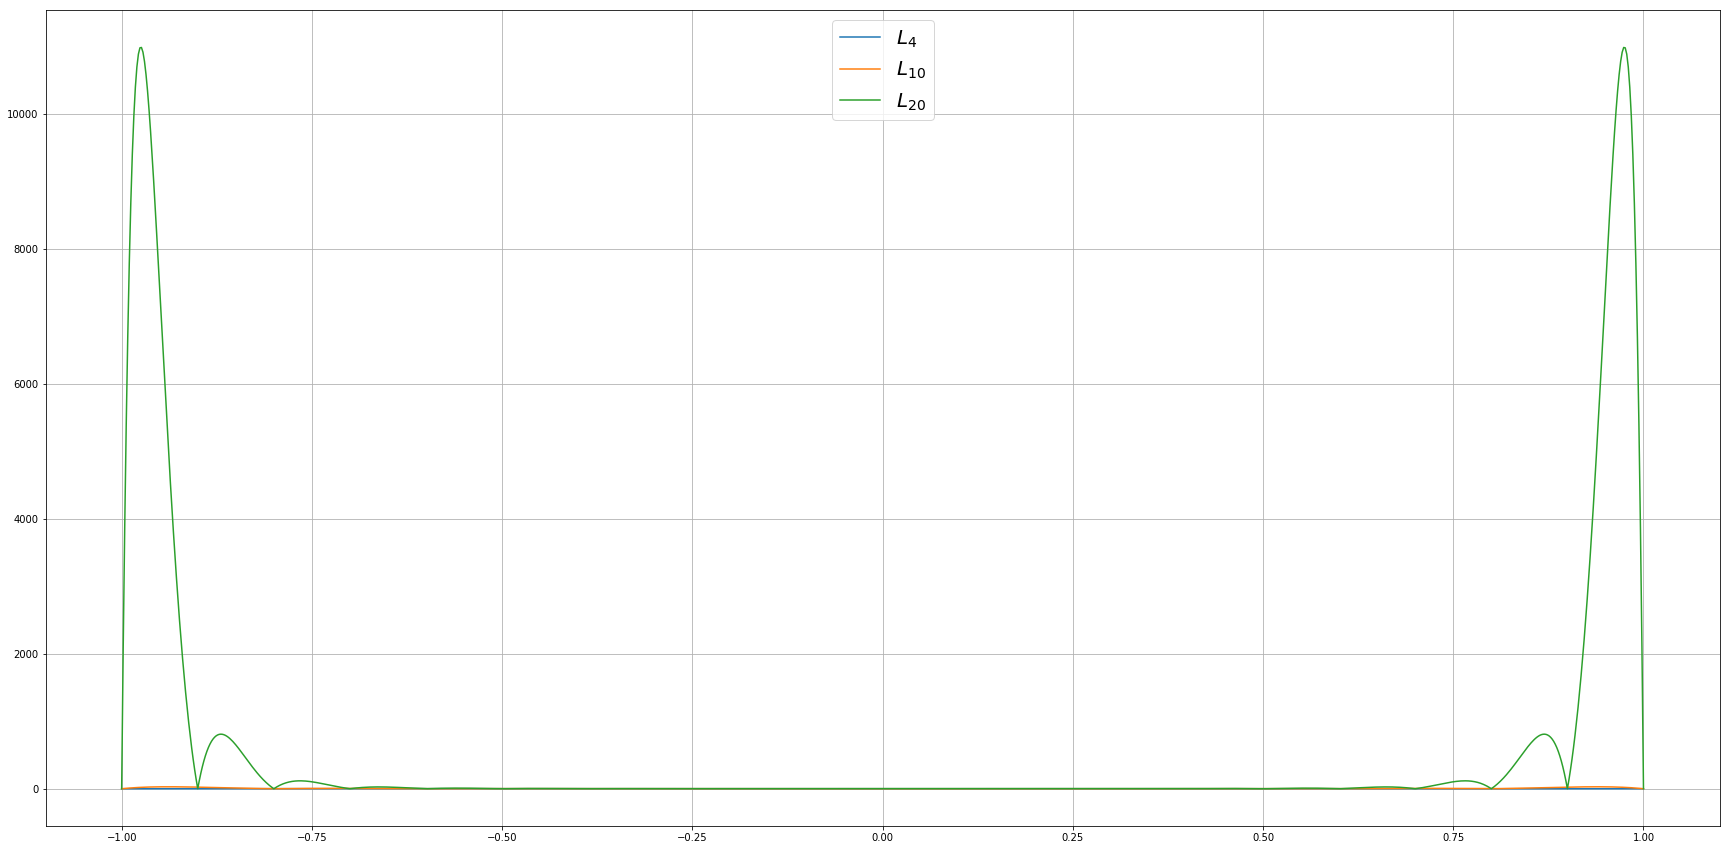

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(x_1000, L_4,
         x_1000, L_10,
         x_1000, L_20,
        )
plt.legend(labels = ('$L_4$','$L_{10}$','$L_{20}$'), fontsize = 20)
plt.grid()
plt.show()

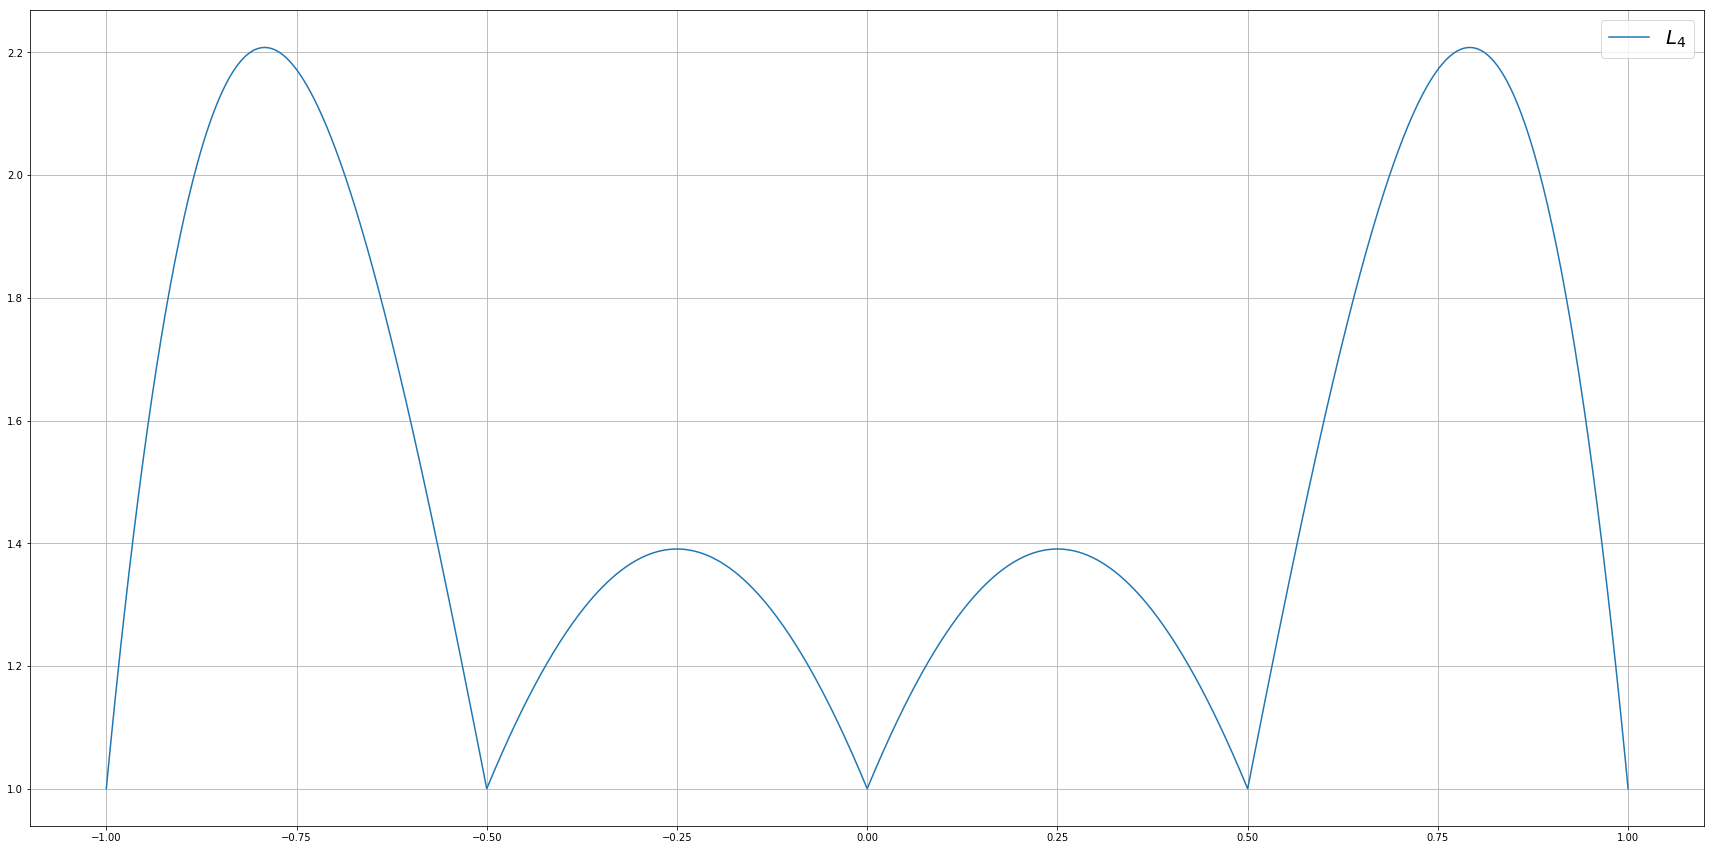

In [160]:
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(x_1000, L_4,
        )
plt.legend(labels = ('$L_4$','$L_{10}$','$L_{20}$'), fontsize = 20)
plt.grid()
plt.show()

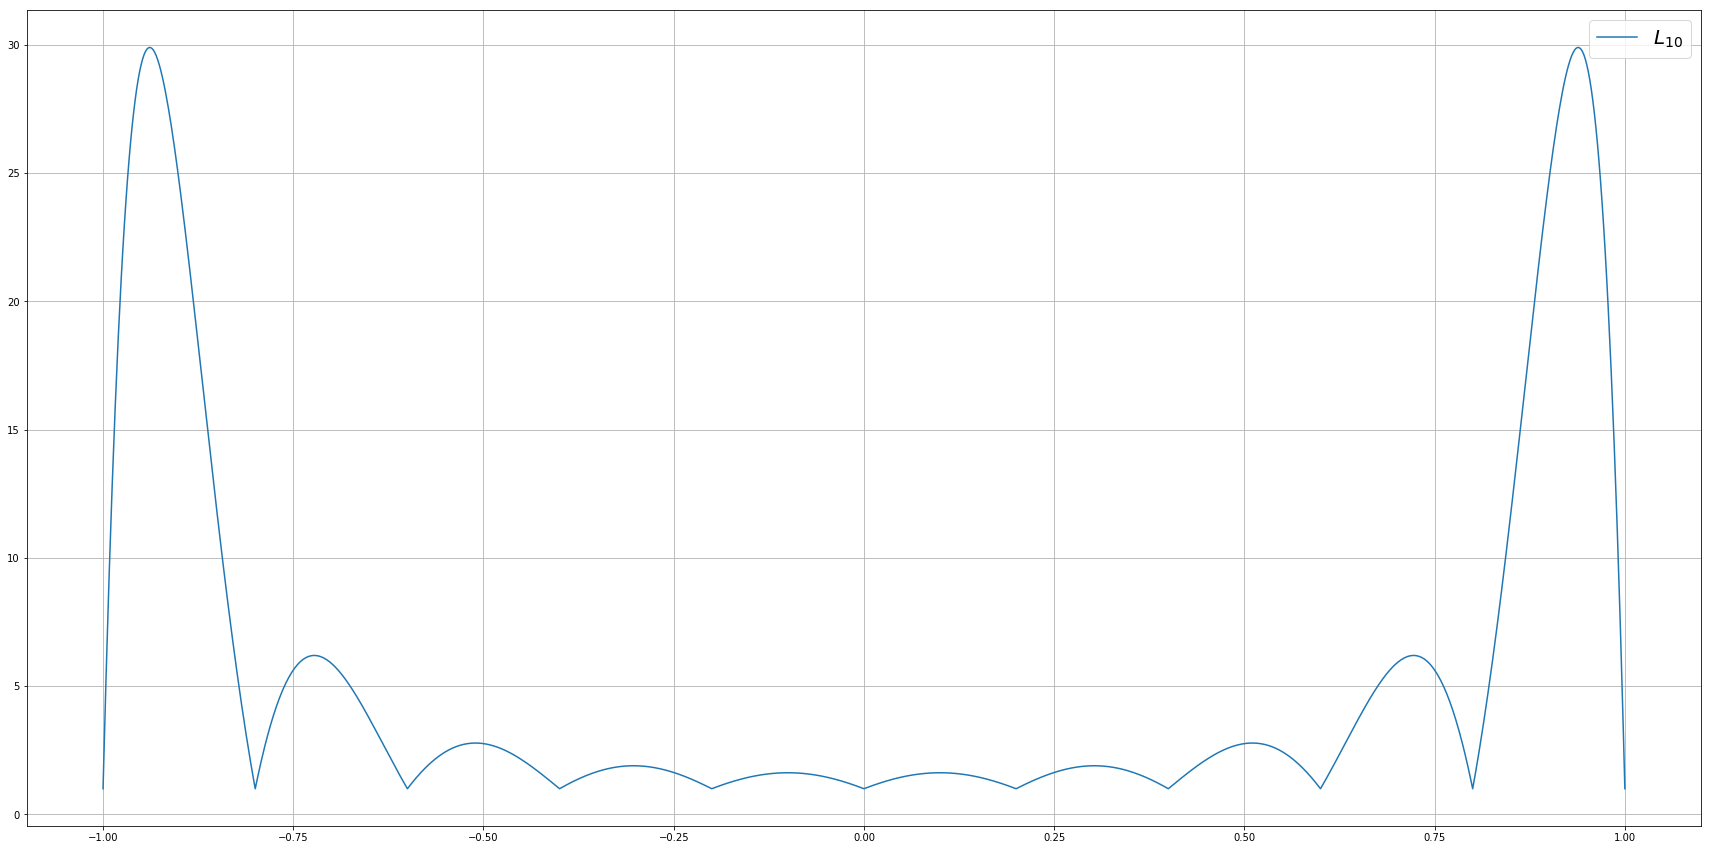

In [161]:
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(x_1000, L_10,
        )
plt.legend(labels = ('$L_{10}$','$L_{20}$'), fontsize = 20)
plt.grid()
plt.show()

In [162]:
lam_4 = np.max(L_4)
lam_10 = np.max(L_10)
lam_20 = np.max(L_20)
print(lam_4)
print(lam_10)
print(lam_20)

2.207824277504
29.898141093562177
10979.243923985843


#### c)

In [163]:
# This is an implementation of the Chebyshev nodes
# Written by Austin Castelo
# 10/27/2018
# INPUT: number of nodes n
# OUPUT: list of n Chebyshev nodes on the interval [-1,1]
def x_j_c(n):
    x_n = np.array([])
    for j in range(0, n+1):
        x_j = np.cos(j*np.pi/n)
        x_n = np.append(x_n, x_j)
    return x_n

In [164]:
x_4 = x_j_c(4)
x_10 = x_j_c(10)
x_20 = x_j_c(20)
L_4 = np.array([])
L_10 = np.array([])
L_20 = np.array([])

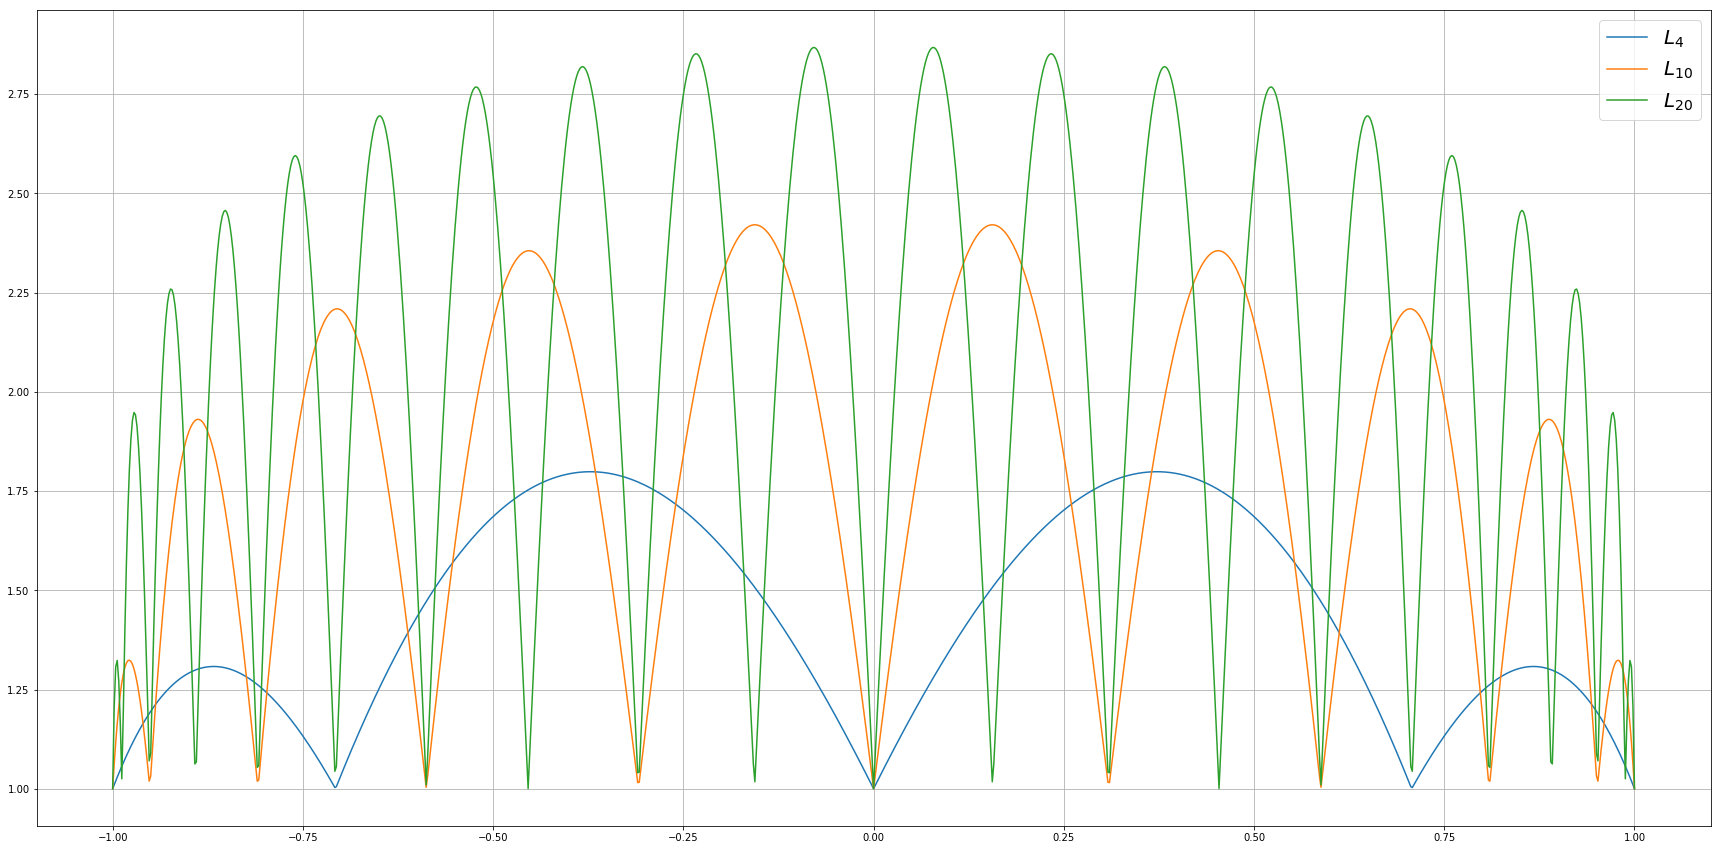

In [165]:
for x in x_1000:
    L_4 = np.append(L_4, L_n(x_4,x))
    L_10 = np.append(L_10, L_n(x_10,x))
    L_20 = np.append(L_20, L_n(x_20,x))
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(x_1000, L_4,
         x_1000, L_10,
         x_1000, L_20,
        )
plt.legend(labels = ('$L_4$','$L_{10}$','$L_{20}$'), fontsize = 20)
plt.grid()
plt.show()

In [166]:
lam_4 = np.max(L_4)
lam_10 = np.max(L_10)
lam_20 = np.max(L_20)
print(lam_4)
print(lam_10)
print(lam_20)

1.7987612872836969
2.4209685111212123
2.86774567337742


The equidistributed points reach their max $\Lambda_n$ values at the tails of the graph, while the Chebyshev points reach their $\Lambda_n$ values on the two local maximiums closest to the center of the graph. The $\lambda$ of the equidistributed points increases by multiple orders of magnitude from n = 10 to n = 20 when the number of nodes increases, while in contrast the $\lambda$ of the Chebyshev points only increases by approximately 0.4. These difference in $\lambda$ are evident in the graphs of the $L_n$s as the scale of difference in $L_n$ for the equidistributed points makes it difficult to capture them in one plot. In, contrast the $L_n$ of the Chebyshev points maintain similiar scale through increases in nodes were the increase in nodes leads to more oscillations.

### 3)
#### a)

In [167]:
# This is an implementation of the Barycentric weights for general nodes
# Written by Austin Castelo
# 10/27/2018
# INPUT: number of nodes n and list of nodes x_n
# OUPUT: list of the Barycentric weights
def B_weight (n, x_n):
    B_w = [np.array([1])]
    for m in range(1,n):
        l_m = np.array([])
        l_mm = 1
        for j in range(0,m):
            l_mj = B_w[m-1][j]/(x_n[j]-x_n[m])
            l_m = np.append(l_m, l_mj)
            l_mm = l_mm/(x_n[m]-x_n[j])
        if m == 1:
            l_mm = l_mm/(x_n[1]-x_n[0])
        l_m = np.append(l_m, l_mm)
        B_w.append(l_m)
    return B_w

In [168]:
B_weight(3, [1,2,3])

[array([1]), array([-1.,  1.]), array([ 0.5, -1. ,  0.5])]

$\lambda_0^0 = 1$

$\lambda_0^1 = -1$ $\lambda_1^1 = 1$

$\lambda_0^2 = 0.5$ $\lambda_1^2 = -1$ $\lambda_2^2 = 0.5$

In [217]:
# This is an implementation of the Barycentric formula
# Written by Austin Castelo
# 10/27/2018
# INPUT: number of nodes n, list of nodes x_n, point to approximate x, list of values of f at x_n f_j, and list of
# Barrycentric weights lam
# OUPUT: Barycentric approximation of f(x)
def B_form(n, x_n, x, f_j, lam):
    top = 0
    bot = 0
    lam = lam
    for j in range(n):
        top += (lam[n-1][j]*f_j[j])/(x-x_n[j])
        bot += (lam[n-1][j])/(x-x_n[j])
    return top/bot

In [218]:
f_j = [1,4,9]
x_n = [1,2,3]
lam = B_weight(3,x_n)
B_form(3, x_n, 4, f_j, lam)

16.000000000000007

#### b)

In [219]:
x_n = [0.0, 0.25, 0.52, 0.74, 1.28, 1.50]
f_j = [0.0, 0.7070, 1.00, 0.7071, -0.7074, -1.00]
lam = B_weight(6,x_n)

B_form(6, x_n, 2, f_j, lam)

0.6750837594713149

$P_5(2)$ approximates $f(2)$ to $0.6750837594713149$

### 4)
#### a)

In [220]:
def f(x):
    f_n = []
    for i in x:
        x_j = 1/(1+25*i*i)
        f_n.append(x_j)
    return f_n
x_4 = x_j(4)
f_4 = f(x_4)
x_8 = x_j(8)
f_8 = f(x_8)
x_12 = x_j(12)
f_12 = f(x_12)

In [231]:
import scipy.special
# This is an implementation of the Barycentric weights for equidistance nodes
# Written by Austin Castelo
# 10/28/2018
# INPUT: number of nodes n
# OUPUT: list of Barrycentric weights
def B_weight_e (n):
    B_w = []
    for m in range(1,n+1):
        l_m = []
        for j in range(0,m+1):
            if j%2==0:
                l_m.append(scipy.special.comb(m,j))
            else:
                l_m.append(-(scipy.special.comb(m,j)))
        B_w.append(l_m)
    return B_w
B_weight_e(10)

[[1.0, -1.0],
 [1.0, -2.0, 1.0],
 [1.0, -3.0, 3.0, -1.0],
 [1.0, -4.0, 6.0, -4.0, 1.0],
 [1.0, -5.0, 10.0, -10.0, 5.0, -1.0],
 [1.0, -6.0, 15.0, -20.0, 15.0, -6.0, 1.0],
 [1.0, -7.0, 21.0, -35.0, 35.0, -21.0, 7.0, -1.0],
 [1.0, -8.0, 28.0, -56.0, 70.0, -56.0, 28.0, -8.0, 1.0],
 [1.0, -9.0, 36.0, -84.0, 126.0, -126.0, 84.0, -36.0, 9.0, -1.0],
 [1.0, -10.0, 45.0, -120.0, 210.0, -252.0, 210.0, -120.0, 45.0, -10.0, 1.0]]

In [250]:
x_n = x_j(1000)
f_n = f(x_n)
p_4 = []
p_8 = []
p_12 = []
lam_4 = B_weight_e(4)
lam_8 = B_weight_e(8)
lam_12 = B_weight_e(12)

for i in range(len(x_n)):
    if x_n[i] not in x_12:
        p_12.append(B_form(12, x_12, x_n[i], f_12, lam_12))
    else:
        p_12.append(f_n[i])
    if x_n[i] not in x_8:
        p_8.append(B_form(8, x_8, x_n[i], f_8, lam_8))
    else:
        p_8.append(f_n[i])
    if x_n[i] not in x_4:
        p_4.append(B_form(4, x_4, x_n[i], f_4, lam_4))
    else:
        p_4.append(f_n[i])

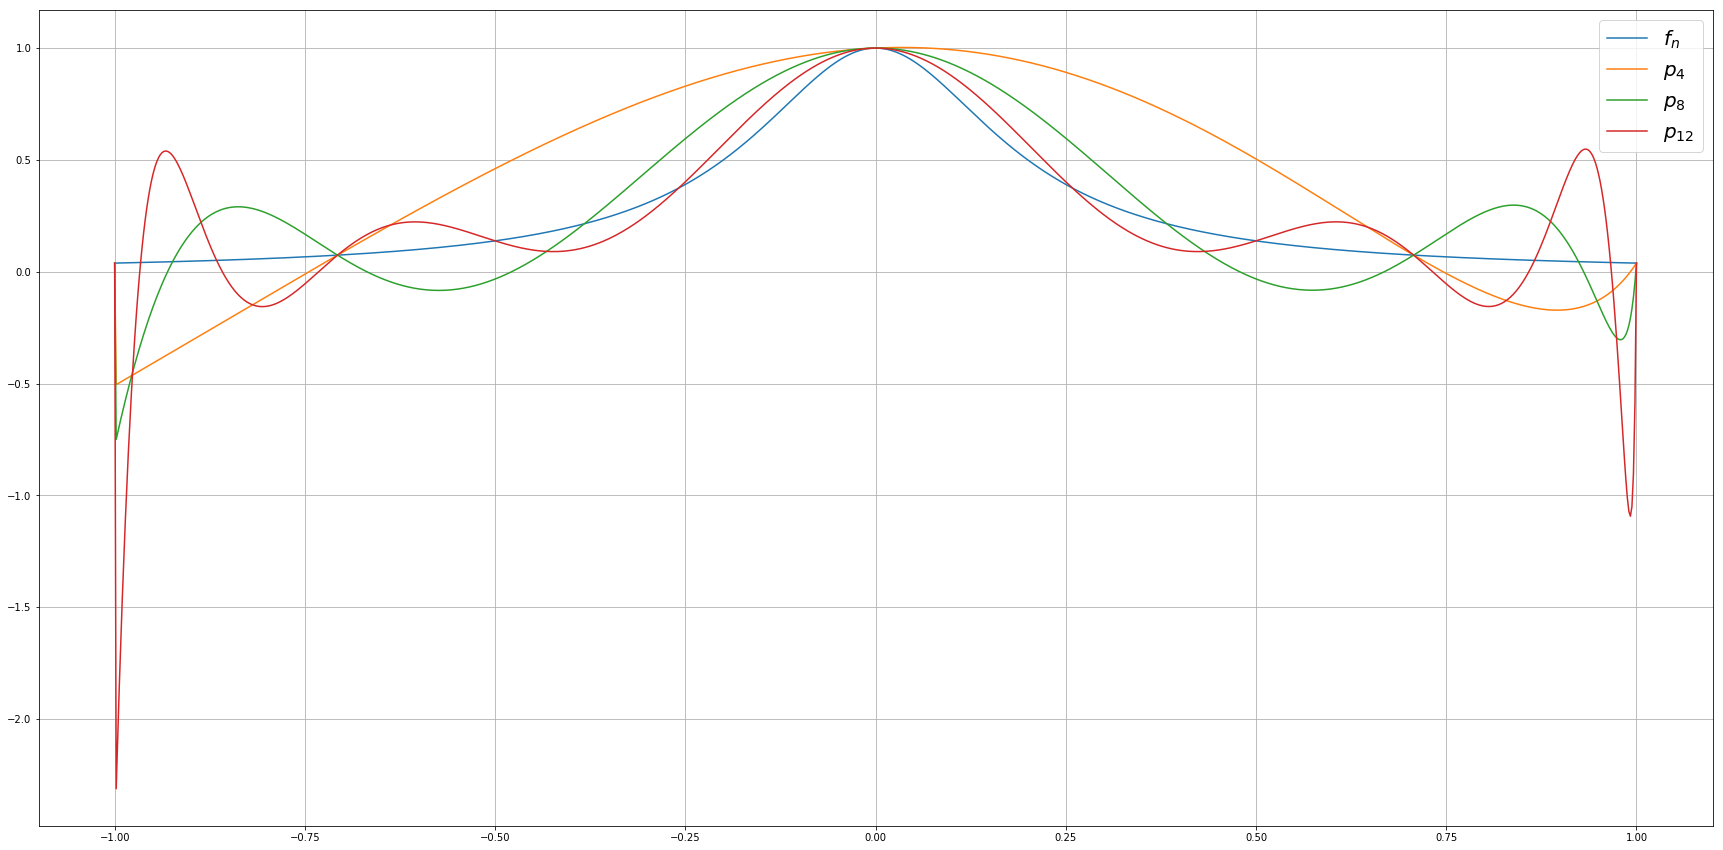

In [251]:
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(x_n, f_n,
         x_n, p_4,
         x_n, p_8,
         x_n, p_12
        )
plt.legend(labels = ('$f_n$','$p_4$','$p_8$', '$p_{12}$'), fontsize = 20)
plt.grid()
plt.show()

#### b)

In [252]:
x_4 = x_j_c(4)
f_4 = f(x_4)
x_8 = x_j_c(8)
f_8 = f(x_8)
x_12 = x_j_c(12)
f_12 = f(x_12)

In [253]:
# This is an implementation of the Barycentric weights for Chebyshev nodes
# Written by Austin Castelo
# 10/28/2018
# INPUT: number of nodes n
# OUPUT: list of Barrycentric weights
def B_weight_c(n):
    B_w = []
    for m in range(1,n+1):
        l_m = [1]
        for j in range(1,m):
            if j%2==0:
                l_m.append(1)
            else:
                l_m.append(-1)
        if m%2 == 0:
            l_m.append(1/2)
        else:
            l_m.append(-1/2)
        B_w.append(l_m)
    return B_w

In [256]:
x_n = x_j(1000)
f_n = f(x_n)
p_4_c = []
p_8_c = []
p_12_c = []
lam_4 = B_weight_c(4)
lam_8 = B_weight_c(8)
lam_12 = B_weight_c(12)

for i in range(len(x_n)):
    if x_n[i] not in x_12:
        p_12_c.append(B_form(12, x_12, x_n[i], f_12, lam_12))
    else:
        p_12_c.append(f_n[i])
    if x_n[i] not in x_8:
        p_8_c.append(B_form(8, x_8, x_n[i], f_8, lam_8))
    else:
        p_8_c.append(f_n[i])
    if x_n[i] not in x_4:
        p_4_c.append(B_form(4, x_4, x_n[i], f_4, lam_4))
    else:
        p_4_c.append(f_n[i])

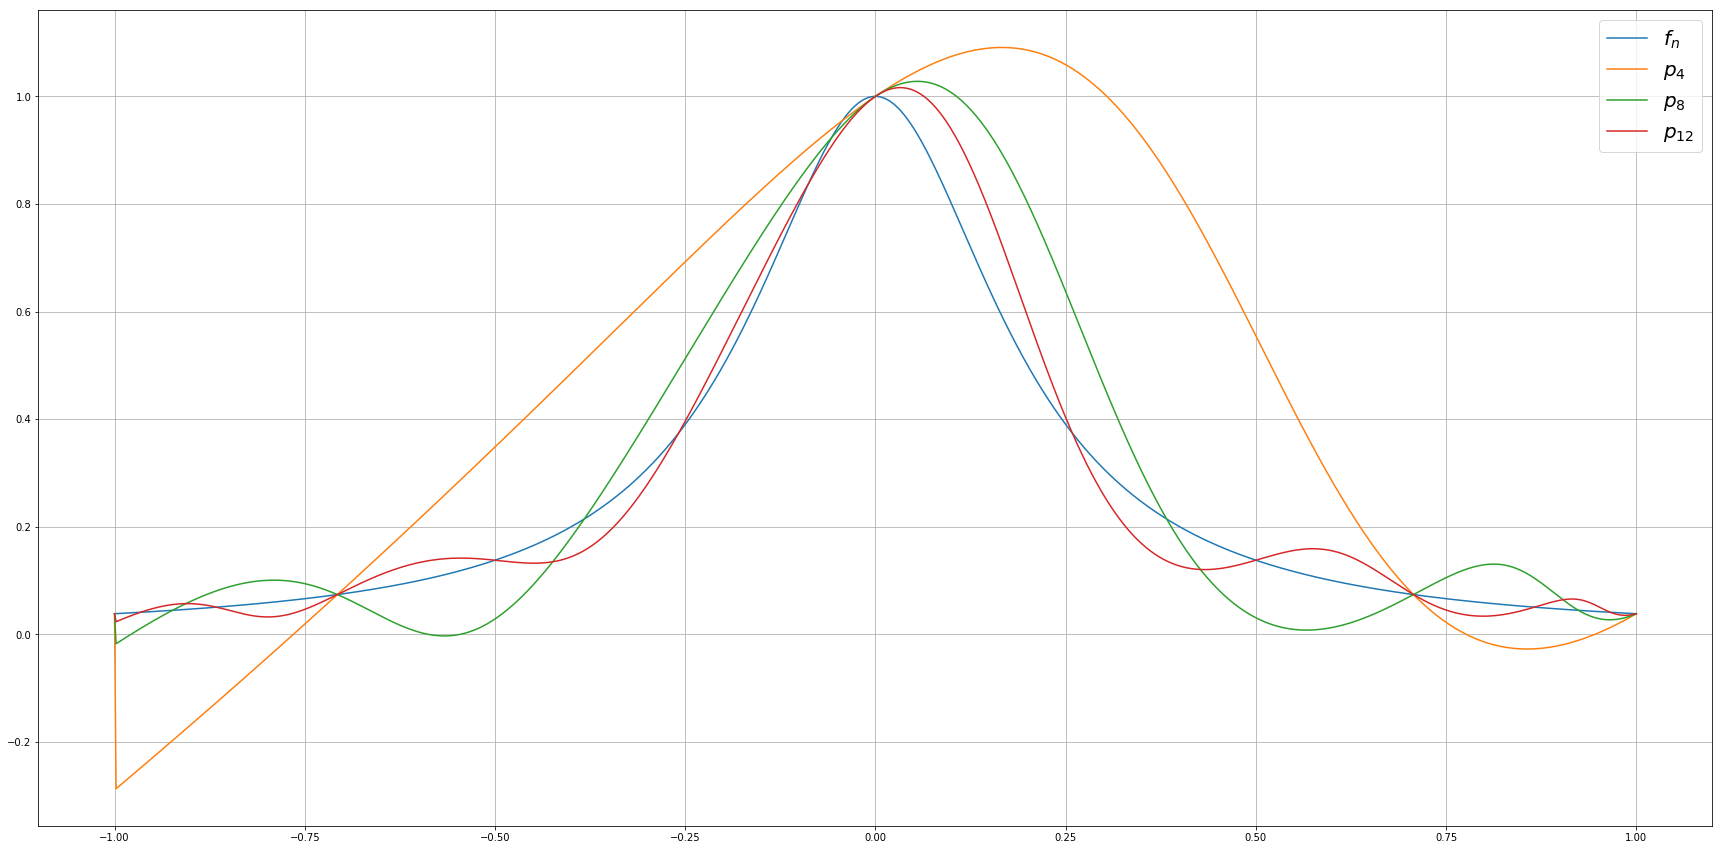

In [257]:
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(x_n, f_n,
         x_n, p_4_c,
         x_n, p_8_c,
         x_n, p_12_c
        )
plt.legend(labels = ('$f_n$','$p_4$','$p_8$', '$p_{12}$'), fontsize = 20)
plt.grid()
plt.show()

#### c)

In [267]:
e_4 = []
e_8 = []
e_12 = []
e_4_c = []
e_8_c = []
e_12_c = []
for i in range(len(f_n)):
    e_4.append(f_n[i]-p_4[i])
    e_8.append(f_n[i]-p_8[i])
    e_12.append(f_n[i]-p_12[i])
    e_4_c.append(f_n[i]-p_4_c[i])
    e_8_c.append(f_n[i]-p_8_c[i])
    e_12_c.append(f_n[i]-p_12_c[i])




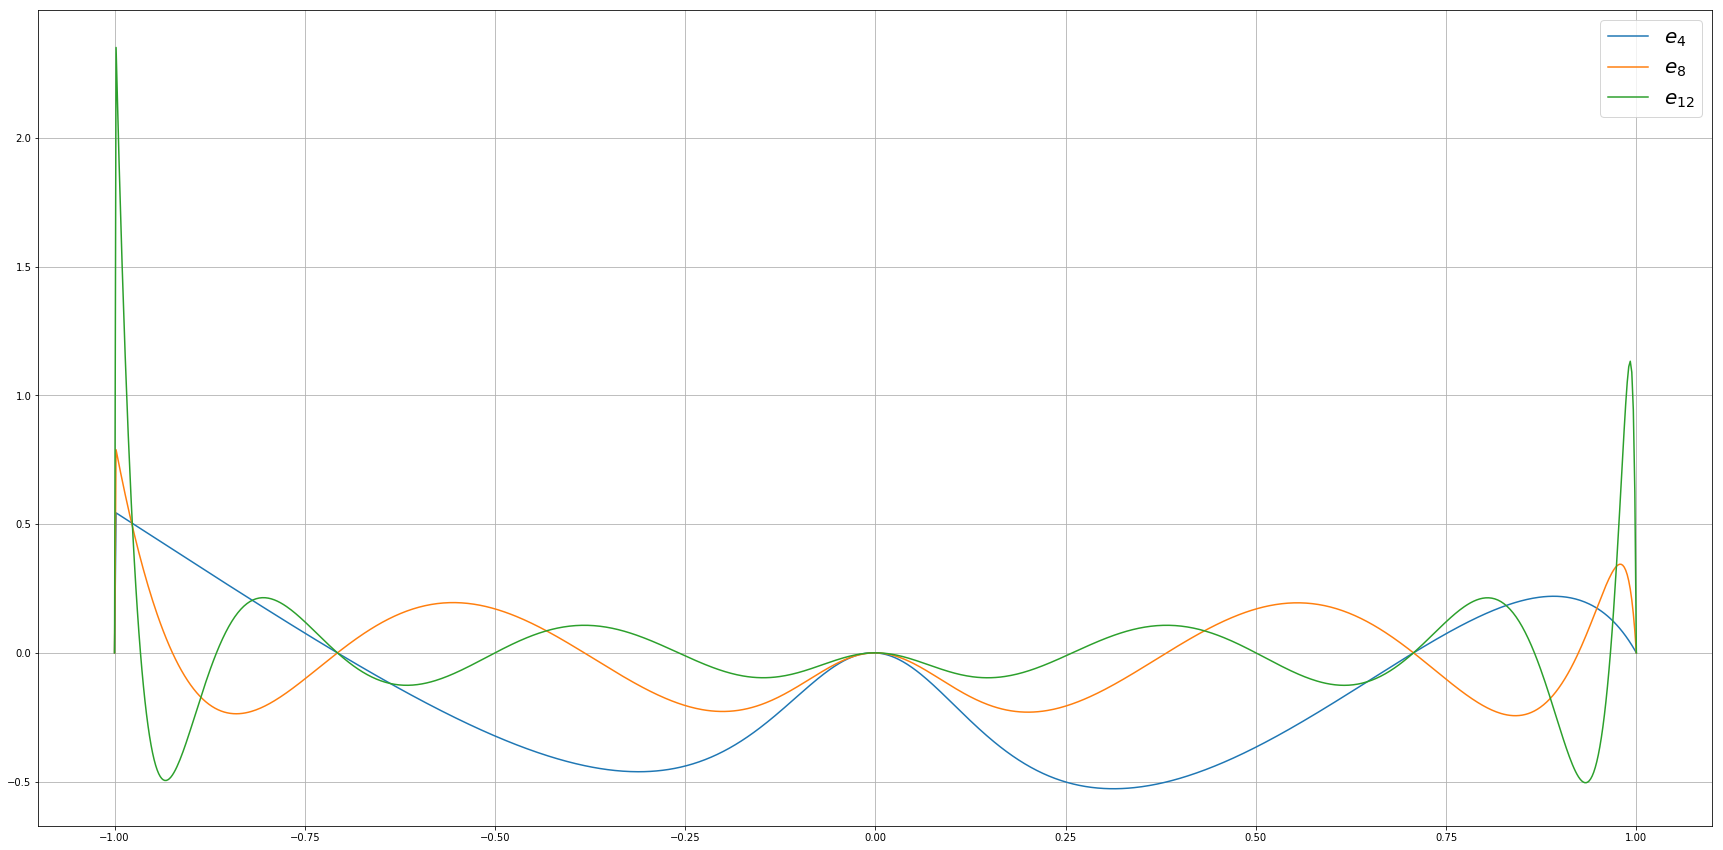

In [270]:
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(x_n, e_4,
         x_n, e_8,
         x_n, e_12,
         
        )
plt.legend(labels = ('$e_4$','$e_8$','$e_{12}$'), fontsize = 20)
plt.grid()
plt.show()

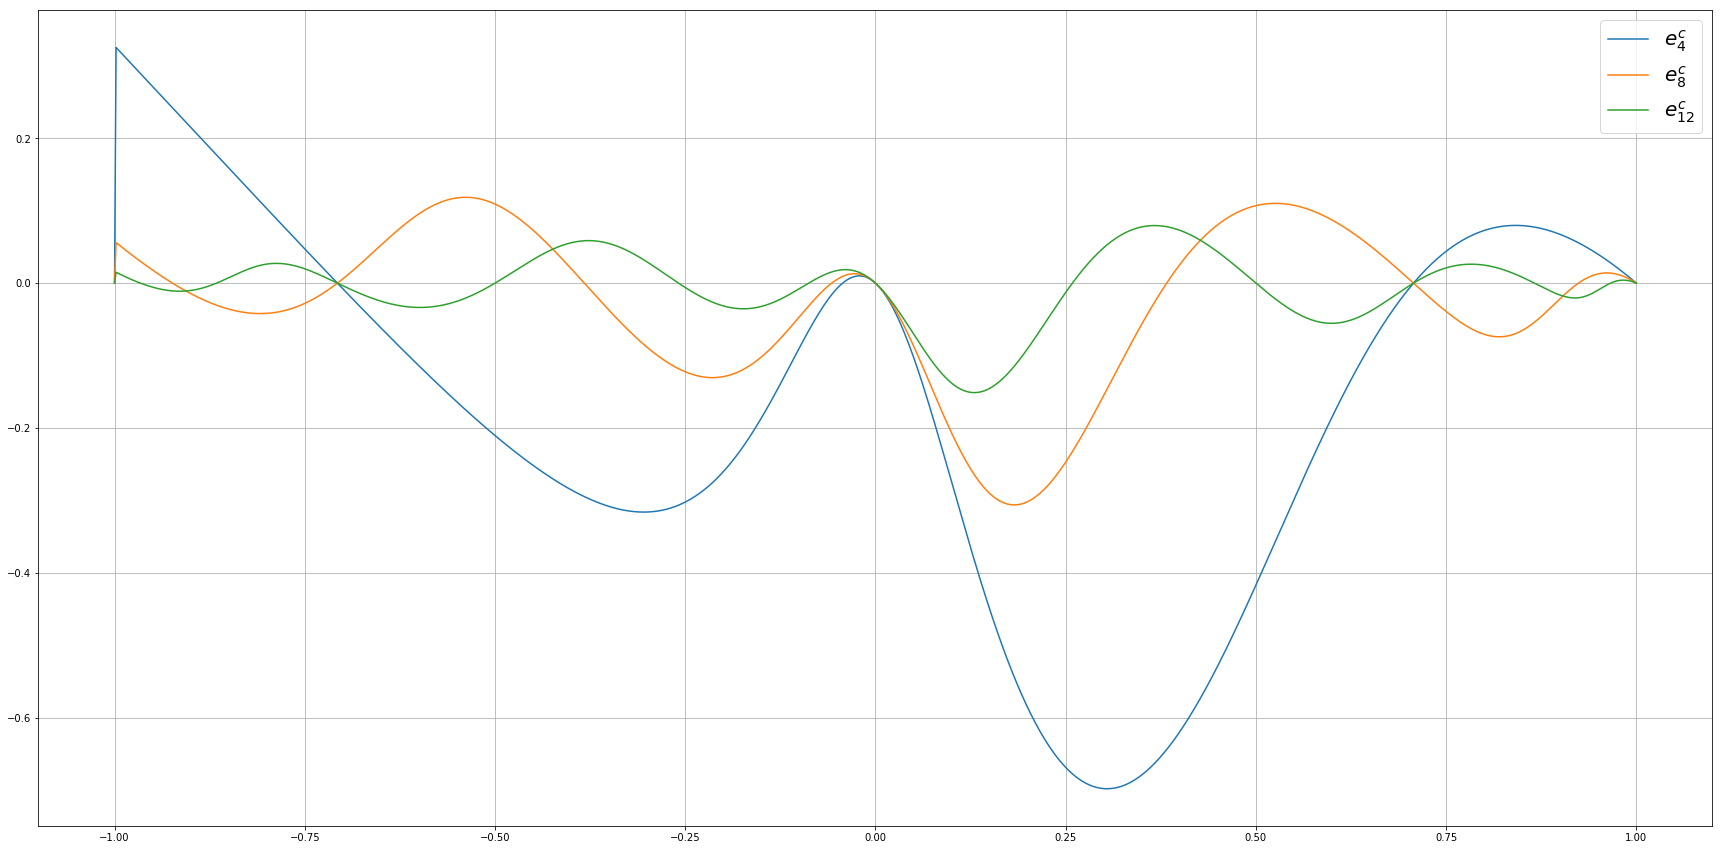

In [271]:
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(x_n, e_4_c,
         x_n, e_8_c,
         x_n, e_12_c
         
        )
plt.legend(labels = ( '$e_4^c$', '$e_8^c$', '$e_{12}^c$'), fontsize = 20)
plt.grid()
plt.show()

The error is a smaller at every point on $f$ for the Chebyshev points for n=8 and n=12. However, the Chebyshev points do not perform better on n=4 on the interval $[0.2, 0.4]$, but still performs better on the rest of the interval.

#### d)

In [272]:
def f(x):
    f_n = []
    for i in x:
        x_j = np.power(np.e, -np.power(i, 2))
        f_n.append(x_j)
    return f_n

In [273]:
x_n = x_j(1000)
f_n = f(x_n)
p_4 = []
p_8 = []
p_12 = []
lam_4 = B_weight_e(4)
lam_8 = B_weight_e(8)
lam_12 = B_weight_e(12)

for i in range(len(x_n)):
    if x_n[i] not in x_12:
        p_12.append(B_form(12, x_12, x_n[i], f_12, lam_12))
    else:
        p_12.append(f_n[i])
    if x_n[i] not in x_8:
        p_8.append(B_form(8, x_8, x_n[i], f_8, lam_8))
    else:
        p_8.append(f_n[i])
    if x_n[i] not in x_4:
        p_4.append(B_form(4, x_4, x_n[i], f_4, lam_4))
    else:
        p_4.append(f_n[i])

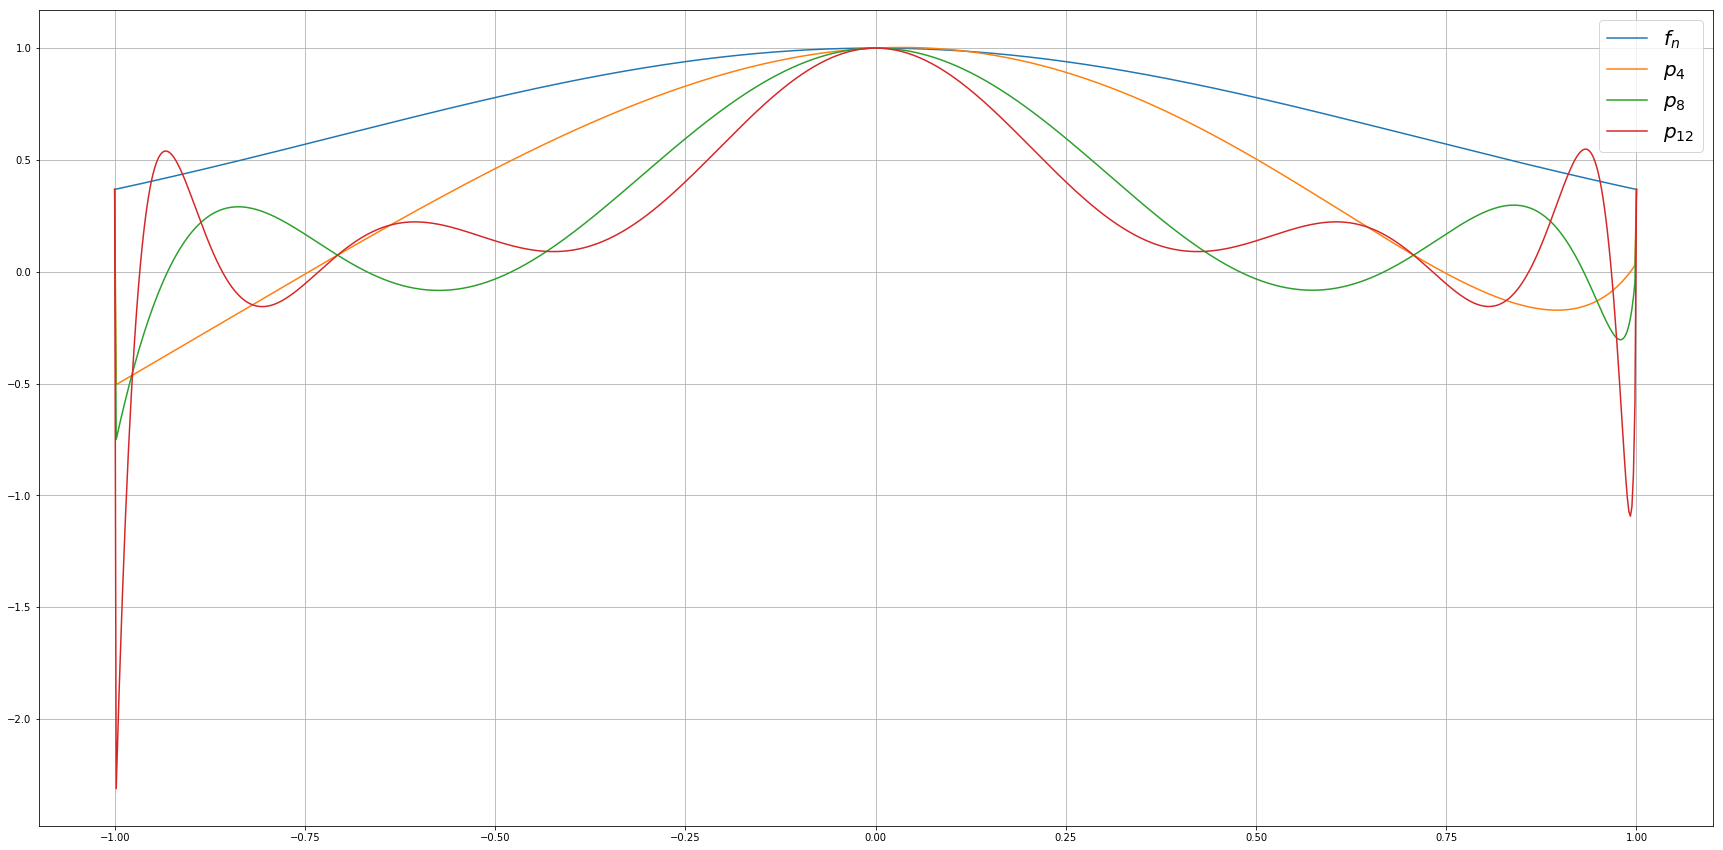

In [274]:
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(x_n, f_n,
         x_n, p_4,
         x_n, p_8,
         x_n, p_12
        )
plt.legend(labels = ('$f_n$','$p_4$','$p_8$', '$p_{12}$'), fontsize = 20)
plt.grid()
plt.show()

$p_4$ seems to approximate $f$ better than $p_8$ and $p_{12}$. This is logical because it is closest to the number of oscillations of $f$ on the interval.